<center><font size = "10"> Week 1 <center>
<center><font size = "8"> Homework 01: Point Neurons <center>

## Exercise 1.1:
Create an integrate-and-fire model neuron with a membrane time constant of 10 milliseconds and a refractory period of 5 milliseconds.

Connect a repetitive stimulus to this.

Simulate the neuron's dynamics multiple times with a fixed stimulus weight of 0.4, varying the stimulus interspike interval between 0.3, 0.5, 1, 2, 5, 8, 12, 15, 20 milliseconds

What do you observe about the relationship between the input rate and output rate? How do you explain this relationship?

Remember that rate = 1 / interval

A qualitative description will do for now. Use markdown cells like this one to write out your descriptions and rationale.
You can make a markdown cell by creating a cell in the notebook, and then clicking on the drop-down "code": 


Hint: define a function to setup and run your simulation with particular values for interval and weight, and use loops to run for a variety of parameter values.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import h
_ = h.Section()

def run_simulation(tau=10, refrac=5, duration=300, interval=10, weight=0.4):
    neuron = h.IntFire1()
    neuron.tau = tau
    neuron.refrac = refrac
    
    stim = h.NetStim()
    stim.interval = interval
    stim.start = 5
    stim.number = int(np.floor(duration / interval))
    
    conn = h.NetCon(stim, neuron)
    conn.weight[0] = weight
    
    time = h.Vector()
    time.record(h._ref_t)  # remember _ from the first code block? this only works when we have that.

    outconn = h.NetCon(neuron, None)  # necessary to record neuron's action potentials 
    output_event_times = h.Vector()
    outconn.record(output_event_times)
    
    h.finitialize()  # initialize the model
    nsteps = int(np.ceil(duration / h.dt))

    Vm = [neuron.M()]  # IntFire does not explicitly store membrane potential. We cannot record it with Vector.record(neuron1._ref_m), so we have to record it as we go
    for step in range(nsteps):
        h.fadvance()
        Vm.append(neuron.M())
    Vm = np.array(Vm)
    return Vm, time, output_event_times

--No graphics will be displayed.


In [2]:
def mean_firing_rate(output_event_times, time):
    return (len(output_event_times) / max(time)) * 1000  # spikes per second 

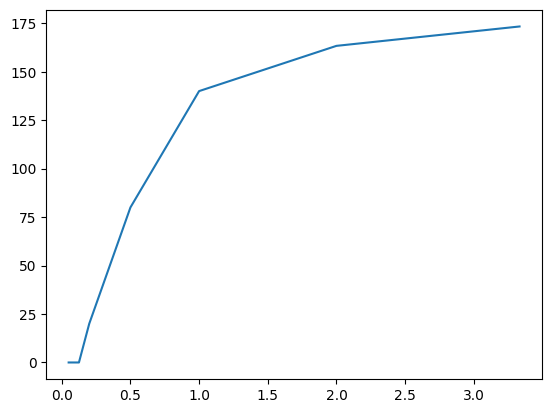

In [3]:

intervals = np.array([0.3, 0.5, 1, 2, 5, 8, 12, 15, 20])

def rates_for_intervals(intervals, weight=None): 
    outrates = []
    for interval in intervals:
        if weight is None:
            vm, time, output = run_simulation(interval=interval)
        else:
            vm, time, output = run_simulation(interval=interval, weight=weight)
        outrates.append(mean_firing_rate(output, time))
    return outrates

outrates = rates_for_intervals(intervals)

plt.plot(1/intervals, outrates)

We can observe that:
- below some minimum input the response is 0
- above that the firing rate increases
- sublinearly up to some soft maximum

## Exercise 1.2:

Repeat 1.1, but this time varying both the interval and the weight, taking the values 0.2, 0.4, 0.6, 0.8 and 1.0 for the weight.

Plot the relationship between input rate and output rate for different weights on the same axis. How does the weight affect this?

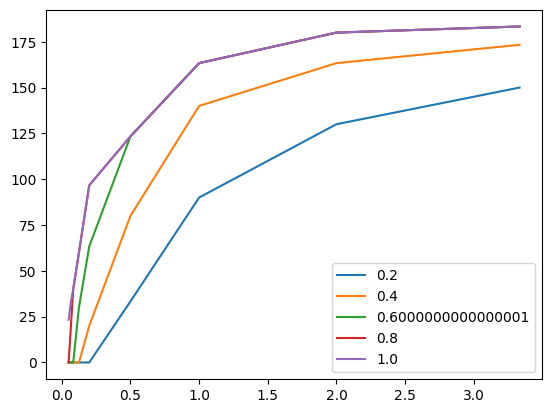

In [4]:
weights = np.arange(0.2, 1.2, 0.2)
for weight in weights:
    outrates = rates_for_intervals(intervals, weight=weight)
    plt.plot(1 / intervals, outrates, label=weight)
plt.legend()

Regarding the role of connection weight

- the connection weight governs the minimum input rate which elicits a response
- the connection weight governs the rate at which the output response reaches the maximum